In [181]:
import pandas as pd  
import numpy as np  
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
data = pd.read_csv('solvs_clean.csv')
data

,name,cas,melting_points,boiling_points,Waste,environement,Health,stability,reactivity,lifecycle,Legislation\rFlag,EHSFLAG
0,water,7732-18-5,0,100,4,10,10,10,10,10,0,0
1,2-ethyl hexanol,104-76-7,-76,185,9,5,6,9,10,6,0,0
2,glycerol,56-81-5,18,290,6,7,8,10,9,8,0,0
3,cyclohexanol,108-93-0,25,161,6,6,7,9,9,8,0,0
4,ethylene glycol,107-21-1,-13,197,5,8,7,10,9,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105,"2,2,2-trifluoroethanol",75-89-8,-43,74,3,5,2,6,9,7,0,r
106,"n,n-dimethylaniline",121-69-7,3,194,7,5,4,8,8,3,2,r
107,triethylamine,121-44-8,-115,89,4,5,3,4,8,7,0,r
108,pyridine,110-86-1,-42,115,3,4,4,7,9,2,2,r


In [183]:
data.dtypes

name                 object
cas                  object
melting_points        int64
boiling_points        int64
Waste                 int64
environement          int64
Health                int64
stability             int64
reactivity            int64
lifecycle             int64
Legislation\rFlag     int64
EHSFLAG              object
dtype: object

In [184]:
def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    x = x.replace('\ ', '_')
    return x.lower()

data.columns = list(map(fe8, data.columns))

Checking for nan values

In [185]:
data.isna().sum()

name                 0
cas                  0
melting_points       0
boiling_points       0
waste                0
environement         0
health               0
stability            0
reactivity           0
lifecycle            0
legislation\rflag    0
ehsflag              0
dtype: int64

dropping cas columns because it is just the ID of the product, it won't affect our model in any way 

In [186]:
data_clean = data.drop(['cas', 'name'], axis = 1)

data_clean.rename(columns= {'legislation\rflag': 'legislation'}, inplace =True)
data_clean

,melting_points,boiling_points,waste,environement,health,stability,reactivity,lifecycle,legislation,ehsflag
0,0,100,4,10,10,10,10,10,0,0
1,-76,185,9,5,6,9,10,6,0,0
2,18,290,6,7,8,10,9,8,0,0
3,25,161,6,6,7,9,9,8,0,0
4,-13,197,5,8,7,10,9,9,0,0
...,...,...,...,...,...,...,...,...,...,...
105,-43,74,3,5,2,6,9,7,0,r
106,3,194,7,5,4,8,8,3,2,r
107,-115,89,4,5,3,4,8,7,0,r
108,-42,115,3,4,4,7,9,2,2,r


In [187]:
data_clean['ehsflag'].replace({'r':'1'}, inplace= True)

In [189]:
data_clean

,melting_points,boiling_points,waste,environement,health,stability,reactivity,lifecycle,legislation,ehsflag
0,0,100,4,10,10,10,10,10,0,0
1,-76,185,9,5,6,9,10,6,0,0
2,18,290,6,7,8,10,9,8,0,0
3,25,161,6,6,7,9,9,8,0,0
4,-13,197,5,8,7,10,9,9,0,0
...,...,...,...,...,...,...,...,...,...,...
105,-43,74,3,5,2,6,9,7,0,1
106,3,194,7,5,4,8,8,3,2,1
107,-115,89,4,5,3,4,8,7,0,1
108,-42,115,3,4,4,7,9,2,2,1


Selecting the features and their types

In [190]:
data_clean.dtypes

melting_points     int64
boiling_points     int64
waste              int64
environement       int64
health             int64
stability          int64
reactivity         int64
lifecycle          int64
legislation        int64
ehsflag           object
dtype: object

In [191]:
# using dictionary to convert specific columns
convert_dict = {'waste': object,
                'environement': object,
                'health': object,
                'stability': object,
                'reactivity': object,
                'lifecycle': object,          
                'legislation': object,
                'melting_points': float,
                'boiling_points' : float,
                'ehsflag': int
                }
 
data_clean = data_clean.astype(convert_dict)
print(data_clean.dtypes)

melting_points    float64
boiling_points    float64
waste              object
environement       object
health             object
stability          object
reactivity         object
lifecycle          object
legislation        object
ehsflag             int32
dtype: object


splitting numericals and categoricals

In [192]:
nums = data_clean.select_dtypes(np.number)
cats = data_clean.select_dtypes(object)

## EDA 

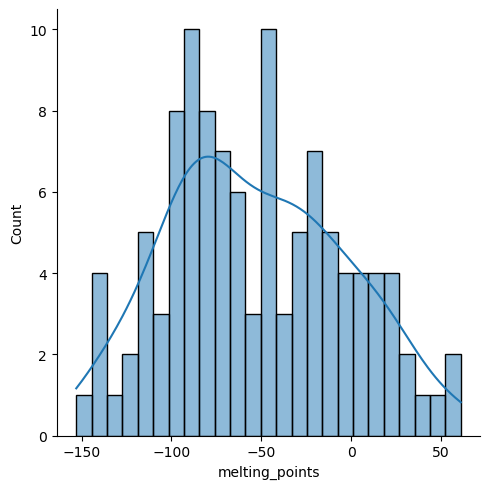

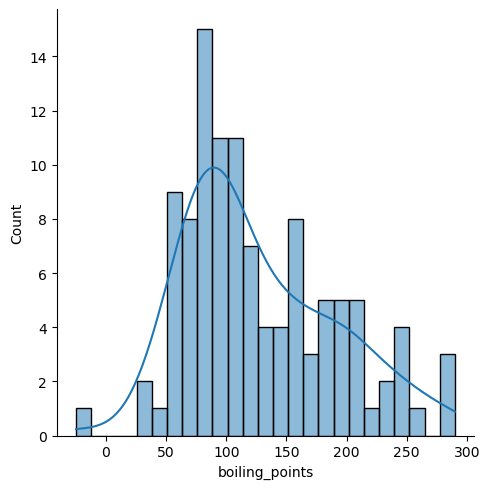

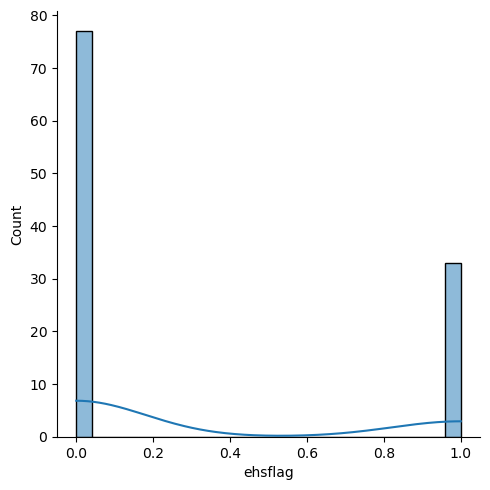

In [193]:
for col in nums.columns:
    sns.displot(nums[col], bins=25, kde = True)
    plt.show()


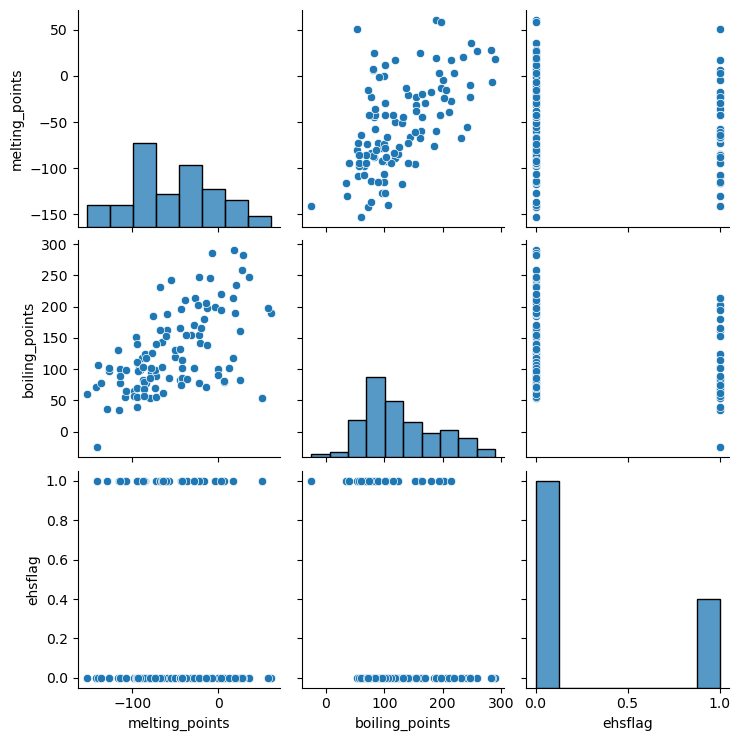

In [194]:
sns.pairplot(nums)
plt.show()
# we can infer a correlation between boiling points and melting points, but it is not relevant in chemical terms

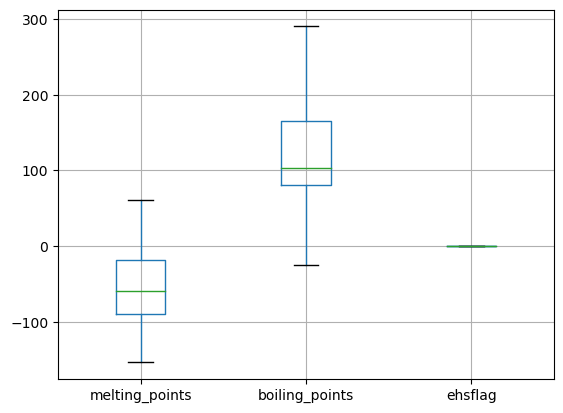

In [195]:
# checking for outliers in nums
nums.boxplot()
plt.show()

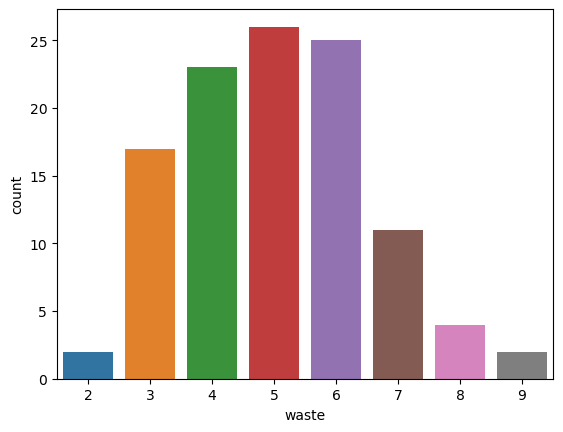

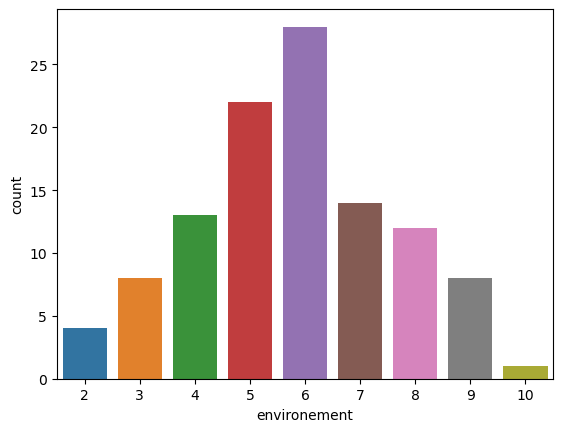

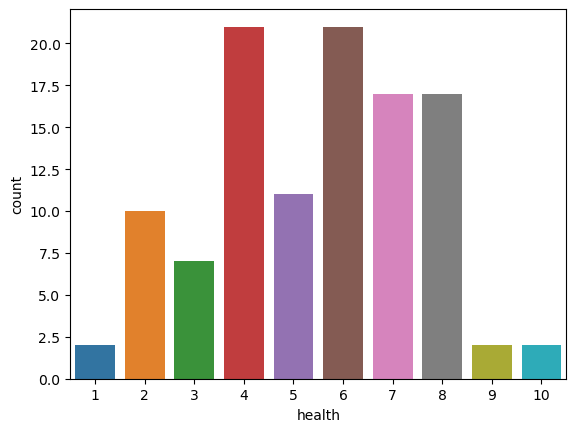

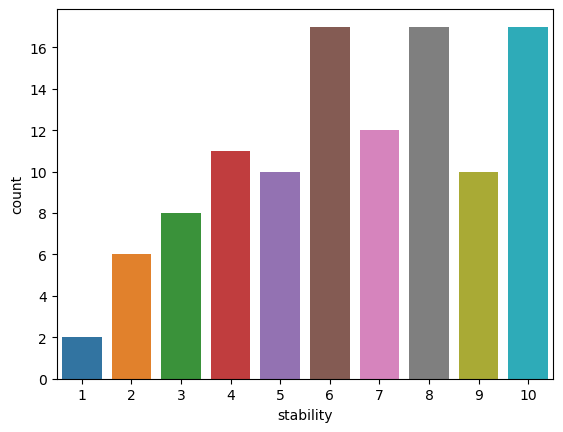

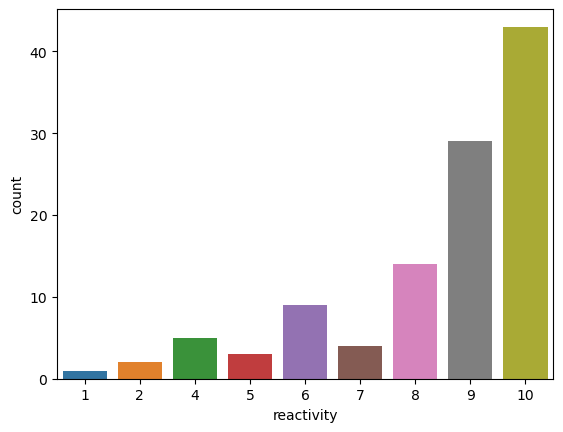

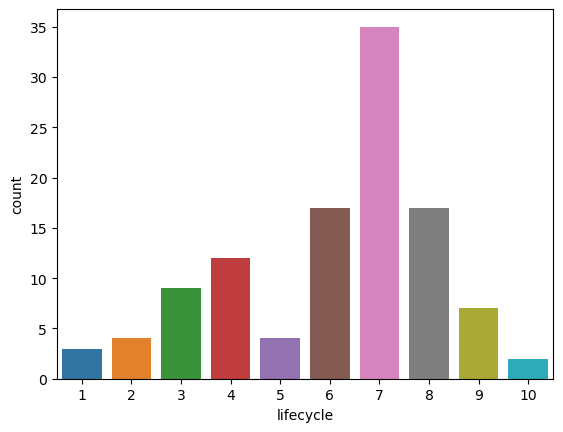

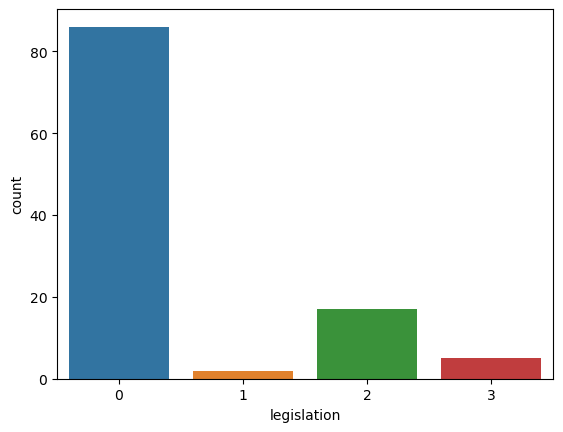

In [196]:
for col in cats.columns:
    sns.countplot(cats[col])
    plt.show()

Checking the heat map for multicolineatity

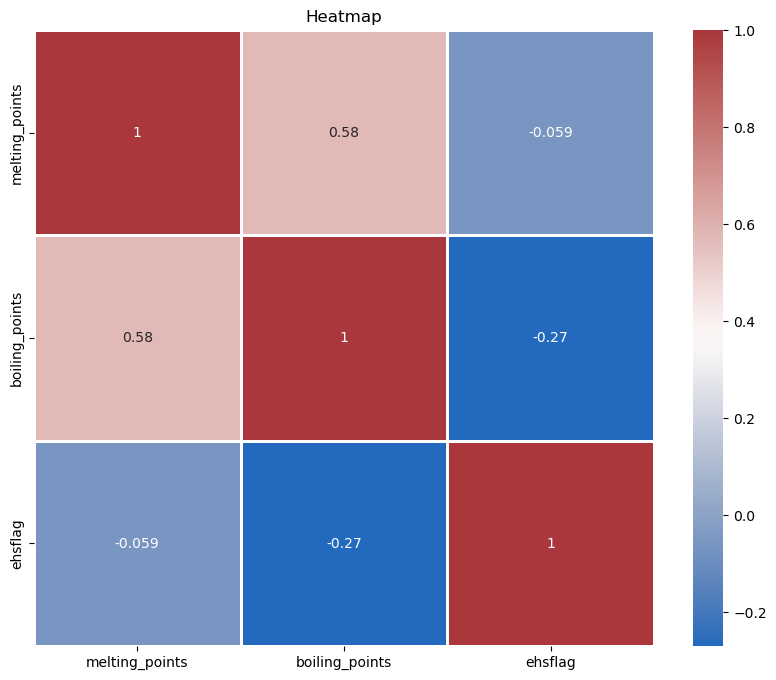

In [197]:
corr_matrix = data_clean.corr(method= 'pearson')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix, annot= True, cmap = sns.color_palette("vlag", as_cmap = True), linewidth = 1, mask = (np.abs(corr_matrix) <= 0.02))
plt.title('Heatmap')
plt.show()

In [198]:
corr_matrix

,melting_points,boiling_points,ehsflag
melting_points,1.000000,0.575328,-0.059380
boiling_points,0.575328,1.000000,-0.269864
ehsflag,-0.059380,-0.269864,1.000000


### splitting the data

In [199]:
from sklearn.model_selection import train_test_split

X = (data_clean.drop(['ehsflag'], axis = 1))
y = (data_clean['ehsflag'])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

In [201]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

## Scalling data

categoricals will be encoded in ordinal, the order matters here

In [202]:
# categoricals
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [203]:
enc= OrdinalEncoder(handle_unknown='error')
encoder = enc.fit(X_train_cat)

X_train_ordinal_encoded = encoder.transform(X_train_cat)


X_train_ordinal_encoded_df = pd.DataFrame(X_train_ordinal_encoded, columns = X_train_cat.columns)
display(X_train_ordinal_encoded_df)
print('*'*150)


,waste,environement,health,stability,reactivity,lifecycle,legislation
0,4.0,6.0,5.0,9.0,7.0,6.0,0.0
1,2.0,4.0,7.0,6.0,7.0,5.0,0.0
2,3.0,4.0,7.0,1.0,8.0,6.0,0.0
3,2.0,2.0,1.0,5.0,8.0,6.0,1.0
4,4.0,6.0,5.0,7.0,7.0,5.0,0.0
...,...,...,...,...,...,...,...
83,7.0,3.0,4.0,7.0,8.0,5.0,0.0
84,6.0,0.0,8.0,5.0,8.0,3.0,2.0
85,5.0,5.0,3.0,8.0,5.0,2.0,3.0
86,2.0,4.0,4.0,3.0,7.0,7.0,0.0


******************************************************************************************************************************************************


In [204]:
X_test_ordinal_encoded = encoder.transform(X_test_cat)
X_test_ordinal_encoded_df = pd.DataFrame(X_test_ordinal_encoded, columns = X_test_cat.columns)
# X_test_ordinal_encoded_df

In [205]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [206]:
#numericals
scaler = MinMaxScaler()
X_train_numerical_min_scaled = scaler.fit_transform(X_train_num)
X_train_numericals_min_scaled_df =pd.DataFrame(X_train_numerical_min_scaled, columns = X_train_num.columns)
# X_train_numericals_min_scaled_df

In [207]:
X_test_numerical_min_scaled = scaler.transform(X_test_num)
X_test_numericals_min_scaled_df =pd.DataFrame(X_test_numerical_min_scaled, columns = X_test_num.columns)
# X_test_numericals_min_scaled_df

In [208]:
# merging train and test
X_train = pd.concat([X_train_numericals_min_scaled_df, X_train_ordinal_encoded_df], axis =1)
X_test = pd.concat([X_test_numericals_min_scaled_df, X_test_ordinal_encoded_df], axis =1)

# data_scaled = pd.concat([numericals_min_scaled_df, ordinal_encoded_df], axis = 1)

librairies

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error as mse

pipepline

In [210]:
model_pipeline = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Logistic regression', 'Decision tree', 'randomforest', 'kneighbors']
scores_pipe_classif= {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
    scores_pipe_classif[model_name] = mean_score
print(scores_pipe_classif)

{'Logistic regression': 0.8375, 'Decision tree': 0.8388888888888889, 'randomforest': 0.8736111111111111, 'kneighbors': 0.7805555555555556}


## Treating the imbalance in the data

SMOTE

In [211]:
from imblearn.over_sampling import SMOTE

In [212]:
def smoting(training_x, training_y):

    smote = SMOTE(random_state = 100, k_neighbors = 3)
    X_train_scaled_SMOTE, y_train_SMOTE = smote.fit_resample(training_x, training_y)

    return X_train_scaled_SMOTE, y_train_SMOTE    

X_train_SMOTE, y_train_SMOTE = smoting(X_train, y_train)
X_test_SMOTE, y_test_SMOTE = smoting(X_test, y_test)

In [213]:
# looking at the random classifier hypertuned
randoclf = RandomForestClassifier(max_depth = 6,  
                             min_samples_split = 5,  
                             min_samples_leaf = 10,
                             n_estimators = 800,
                             max_features = 'sqrt', 
                             bootstrap= False,
                             random_state = 88)

randoclf.fit(X_train_SMOTE, y_train_SMOTE)

print('Score of trainSet = ', randoclf.score(X_train_SMOTE, y_train_SMOTE))
print('Score of testSet = ', randoclf.score(X_test_SMOTE, y_test_SMOTE))

Score of trainSet =  0.953125
Score of testSet =  0.9230769230769231


In [214]:
# Define function to run all models
def models_functions(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)

        train_mse = mse(model.predict(X_train), y_train)
        test_mse = mse(model.predict(X_test), y_test)

        print(f"{model.__class__.__name__}:\n   Train = {model.score(X_train, y_train)}, \n   Test = {model.score(X_test, y_test)}, \n   RMSE for the Test = { test_mse**.5}")

In [215]:
models = [LogisticRegression(),KNeighborsClassifier(), MLPClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
models_functions(models, X_train_SMOTE, y_train_SMOTE, X_test_SMOTE, y_test_SMOTE)

LogisticRegression:
   Train = 0.90625, 
   Test = 0.8461538461538461, 
   RMSE for the Test = 0.3922322702763681
KNeighborsClassifier:
   Train = 0.90625, 
   Test = 0.9230769230769231, 
   RMSE for the Test = 0.2773500981126146
MLPClassifier:
   Train = 0.90625, 
   Test = 0.9230769230769231, 
   RMSE for the Test = 0.2773500981126146
DecisionTreeClassifier:
   Train = 1.0, 
   Test = 0.8076923076923077, 
   RMSE for the Test = 0.4385290096535146
RandomForestClassifier:
   Train = 1.0, 
   Test = 0.8846153846153846, 
   RMSE for the Test = 0.3396831102433787


score of the random classifier SMOTE


In [225]:
preds_random_forest = randoclf.predict(X_test_SMOTE)
preds_random_forest_nosmote = randoclf.predict(X_test)

print('accuracy_smote:', accuracy_score(y_test_SMOTE, preds_random_forest))
print('precision_smote: ', precision_score(preds_random_forest, y_test_SMOTE))
print("recall_smote: ", recall_score(preds_random_forest, y_test_SMOTE))
print("f1_smote: ", f1_score( preds_random_forest, y_test_SMOTE))
print('*' *150)

print('accuracy:', accuracy_score(y_test, preds_random_forest_nosmote))
print('precision: ', precision_score(preds_random_forest_nosmote, y_test))
print("recall: ", recall_score(preds_random_forest_nosmote, y_test))
print("f1: ", f1_score( preds_random_forest_nosmote, y_test))

accuracy_smote: 0.9230769230769231
precision_smote:  0.8461538461538461
recall_smote:  1.0
f1_smote:  0.9166666666666666
******************************************************************************************************************************************************
accuracy: 0.9090909090909091
precision:  0.7777777777777778
recall:  1.0
f1:  0.8750000000000001


/w smote

Confusion metrics

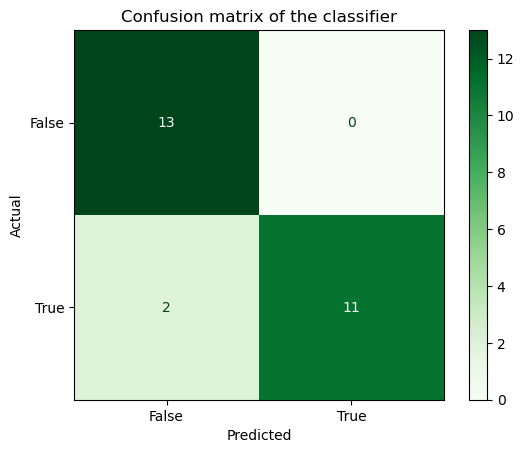

In [227]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test_SMOTE, preds_random_forest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap = plt.cm.Greens)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.jpg')
plt.show()

Treating the imbalance data with SMOTE helped us improve our accuracy !

We manage to predict with 93 % accuracy the solvents who are going to be classified as toxic and harmfull for the environement and the humans.

In our prediction we manage to minimise our false negative , and in the long run it will have an impact on our health and environment.

Despite the 1.0 recall, witch is commun for our small dataset, we manage to build a classifier thaht will be implemented with more data and more refining (e.g grid or random search)


## TAbleau datasets

In [218]:
# nums.to_csv('numericals_tableau.csv',index= False)
# cats.to_csv('categoricals_tableau.csv', index = False)
# data_clean.to_csv('full_tableau.csv', index =False)